# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [66]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('./Salaries.csv') 
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# 1.Basic Data Exploration

In [67]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [68]:
print(f'Number of rows :{df.shape[0]}')
print(f'Number of columns :{df.shape[1]}')

Number of rows :148654
Number of columns :13


In [69]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [70]:
print(df.dtypes)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [71]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## 2.Descriptive Statistics

In [72]:
# Basic statistics 
salary_stats = df['BasePay'].describe()

# Calculate mode 
salary_mode = df['BasePay'].mode()

# Calculate the range of salaries
salary_range = df['BasePay'].max() - df['BasePay'].min()

# Calculate the standard deviation 
salary_std_dev = df['BasePay'].std()

# Print the results
print(f'Mean Salary: {salary_stats["mean"]}')
print(f'Median Salary: {df["BasePay"].median()}')
print(f'Mode Salary: {salary_mode.values}')
print(f'Minimum Salary: {salary_stats["min"]}')
print(f'Maximum Salary: {salary_stats["max"]}')
print(f'Range of Salaries: {salary_range}')
print(f'Standard Deviation of Salaries: {salary_std_dev}')

Mean Salary: 66325.4488404877
Median Salary: 65007.45
Mode Salary: [0.]
Minimum Salary: -166.01
Maximum Salary: 319275.01
Range of Salaries: 319441.02
Standard Deviation of Salaries: 42764.63549525887


## 3.Data Cleaning

In [73]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [74]:
# Get percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) *100

# Print the null percentages
print("Null Percentage for Each Column:")
print(null_percentage)


Null Percentage for Each Column:
Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64


In [75]:
threshold = 50
columns_to_drop = null_percentage[null_percentage > threshold].index
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


In [76]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')

# Impute missing values in 'BasePay' and 'Benefits' with mean
df['BasePay'] = numeric_imputer.fit_transform(df[['BasePay']])
df['Benefits'] = numeric_imputer.fit_transform(df[['Benefits']])

# Impute missing values in 'OvertimePay' and 'OtherPay' with zero
df['OvertimePay'] = df['OvertimePay'].fillna(0)
df['OtherPay'] = df['OtherPay'].fillna(0)

print("\nDataFrame after imputing missing values:")
print(df.isnull().sum())


DataFrame after imputing missing values:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [77]:
df.duplicated().sum()

0

In [78]:
# Get count of unique values for each column
unique_counts = df.nunique()

# Display the result
print("Count of unique values in each column:")
print(unique_counts)

Count of unique values in each column:
Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109490
OvertimePay          65998
OtherPay             83225
Benefits             98466
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Agency                   1
dtype: int64


In [79]:
# Drop the 'Agency' column .. it has only one unique value
df = df.drop('Agency', axis=1)

df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011


## 4.Basic Data Visualization

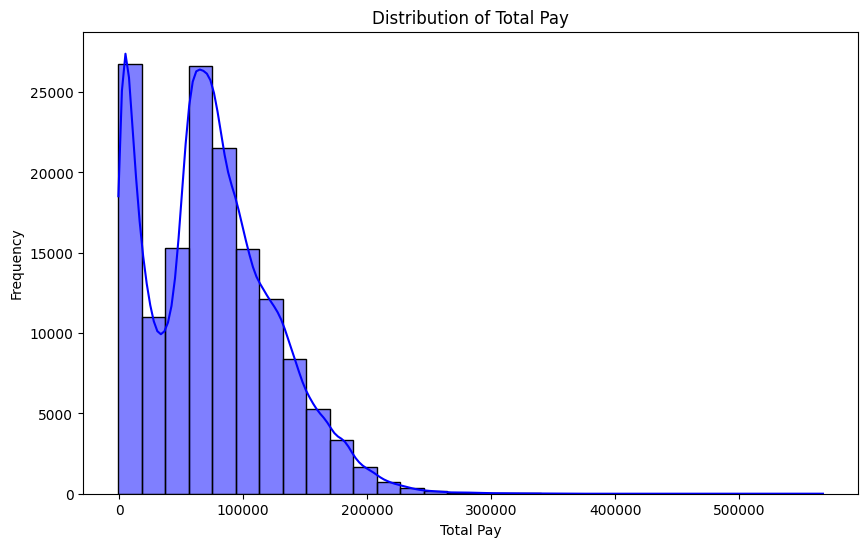

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

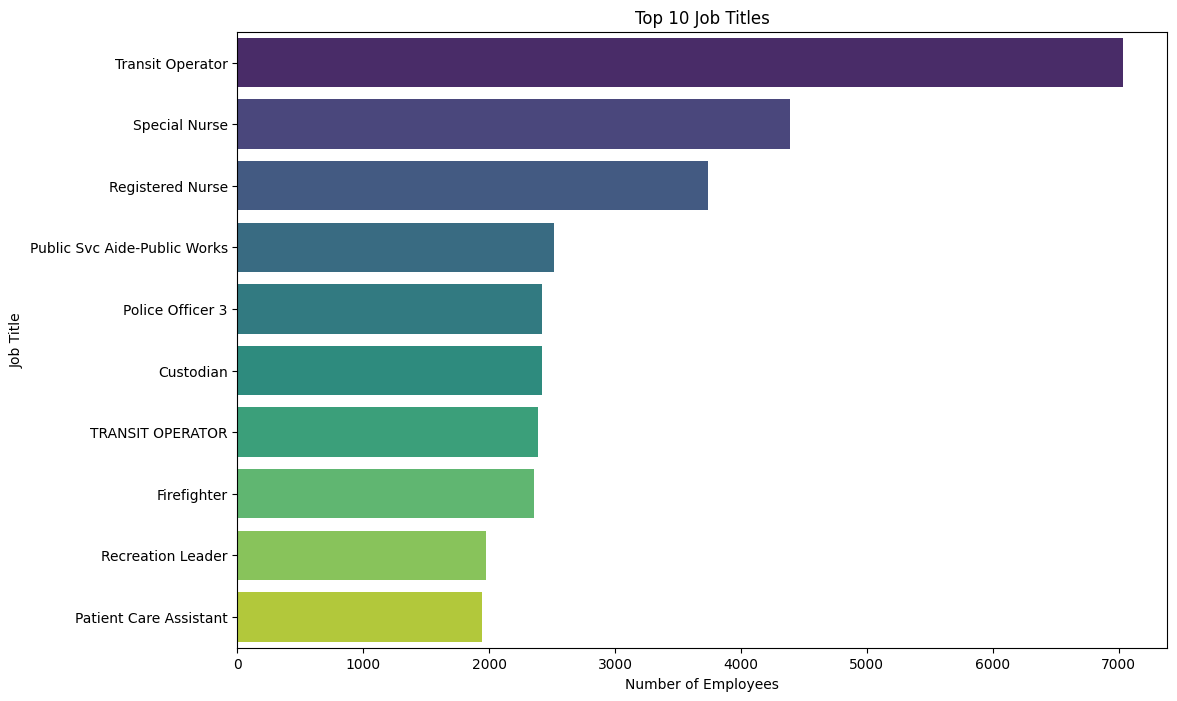

In [81]:
# Bar chart for department distribution (top 10)
plt.figure(figsize=(12, 8))
department_counts = df['JobTitle'].value_counts().nlargest(10)
sns.barplot(x=department_counts.values, y=department_counts.index, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.show()

In [82]:
department_counts

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

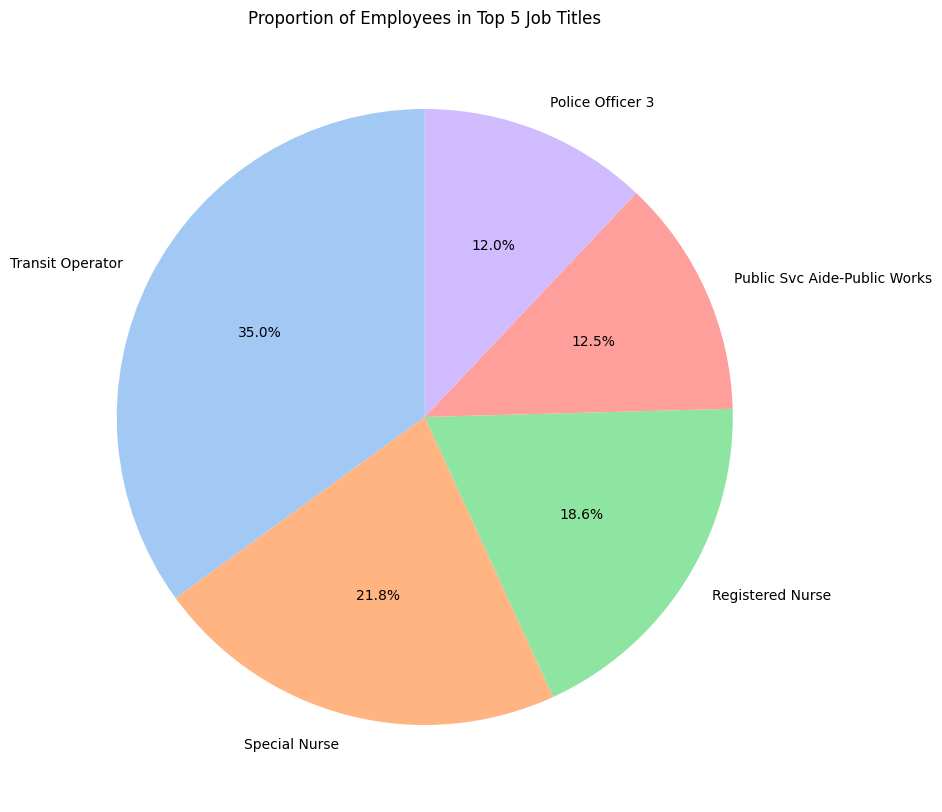

In [83]:
# Pie chart for department proportion (top 5)
plt.figure(figsize=(10, 10))
department_proportion = df['JobTitle'].value_counts(normalize=True).nlargest(5)
plt.pie(department_proportion, labels=department_proportion.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Top 5 Job Titles')
plt.show()

## 4.Grouped Analysis

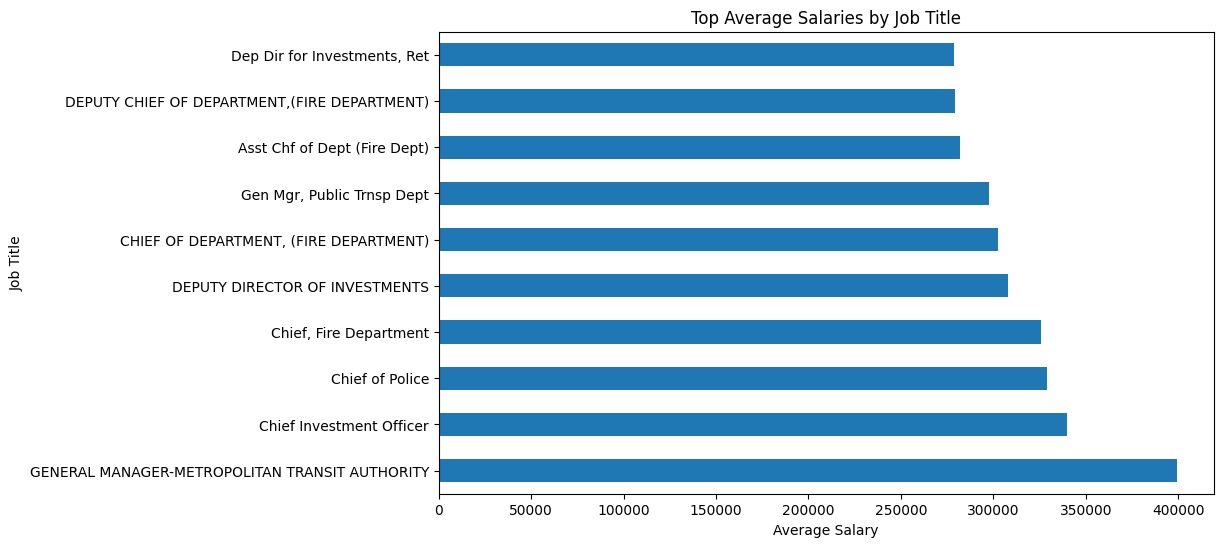

In [84]:
# Grouping the data by job title and calculating average salary
average_salary_by_job_title = df.groupby('JobTitle')['TotalPay'].mean()
# print(f'average_salary_by_job_title: {average_salary_by_job_title}')

top_average_salaries = average_salary_by_job_title.nlargest(10)
# Visualization of top average salaries by job title (horizontal bar plot)
top_average_salaries.plot(kind='barh', figsize=(10, 6))
plt.title('Top Average Salaries by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()

In [85]:
top_average_salaries

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Gen Mgr, Public Trnsp Dept                        297769.413333
Asst Chf of Dept (Fire Dept)                      281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
Dep Dir for Investments, Ret                      278592.545000
Name: TotalPay, dtype: float64

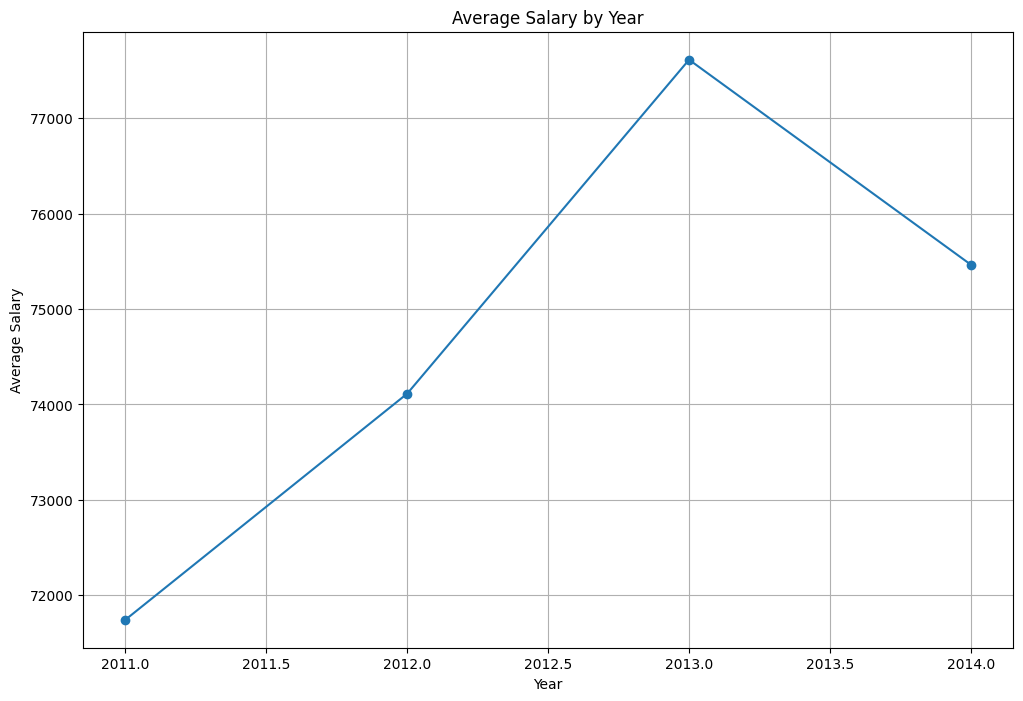

In [86]:
# Grouping the data by year and calculating average salary
average_salary_by_year = df.groupby('Year')['TotalPay'].mean()
# print(f'average_salary_by_year: {average_salary_by_year}')

# line plot
average_salary_by_year.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()


In [87]:
average_salary_by_year

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

## 5.Simple Correlation Analysis

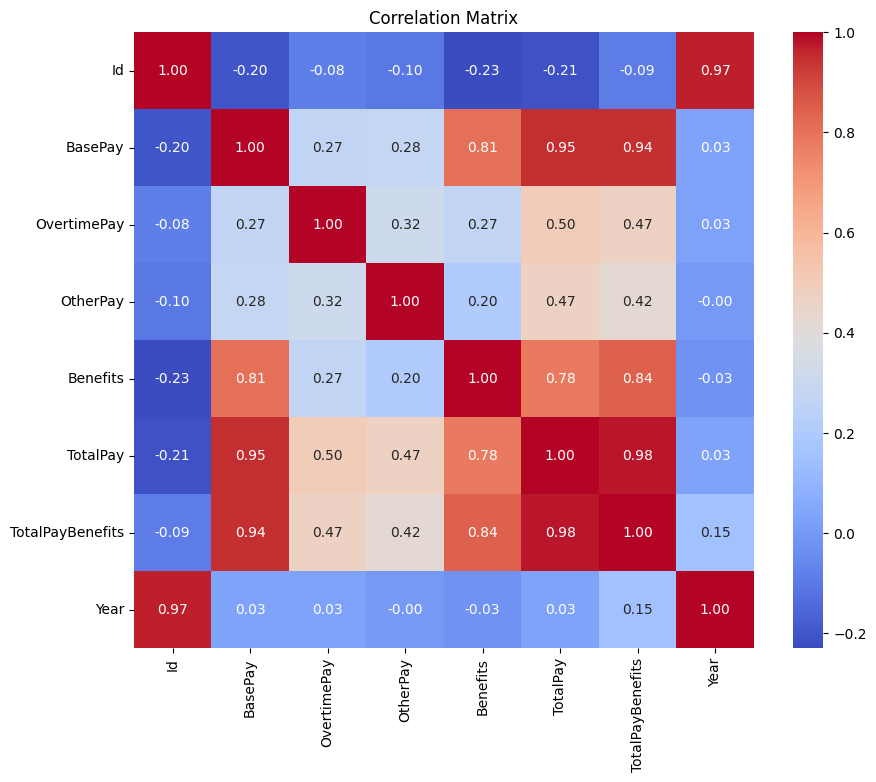

In [88]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [93]:
correlation_matrix

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.204628,-0.081523,-0.100419,-0.229712,-0.211478,-0.092190,0.968171
BasePay,-0.204628,1.000000,0.266633,0.283759,0.806665,0.950514,0.942999,0.033737
OvertimePay,-0.081523,0.266633,1.000000,0.316595,0.268538,0.504860,0.467984,0.027870
OtherPay,-0.100419,0.283759,0.316595,1.000000,0.203621,0.470499,0.422345,-0.002515
Benefits,-0.229712,0.806665,0.268538,0.203621,1.000000,0.782687,0.843039,-0.027393
TotalPay,-0.211478,0.950514,0.504860,0.470499,0.782687,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.942999,0.467984,0.422345,0.843039,0.977313,1.000000,0.151947
Year,0.968171,0.033737,0.027870,-0.002515,-0.027393,0.032090,0.151947,1.000000


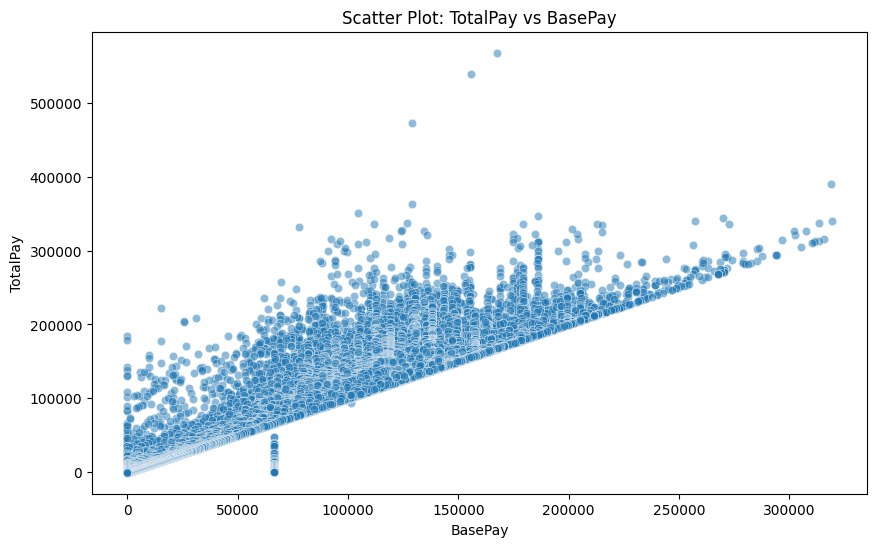

In [89]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.5)
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

## Drop outliers

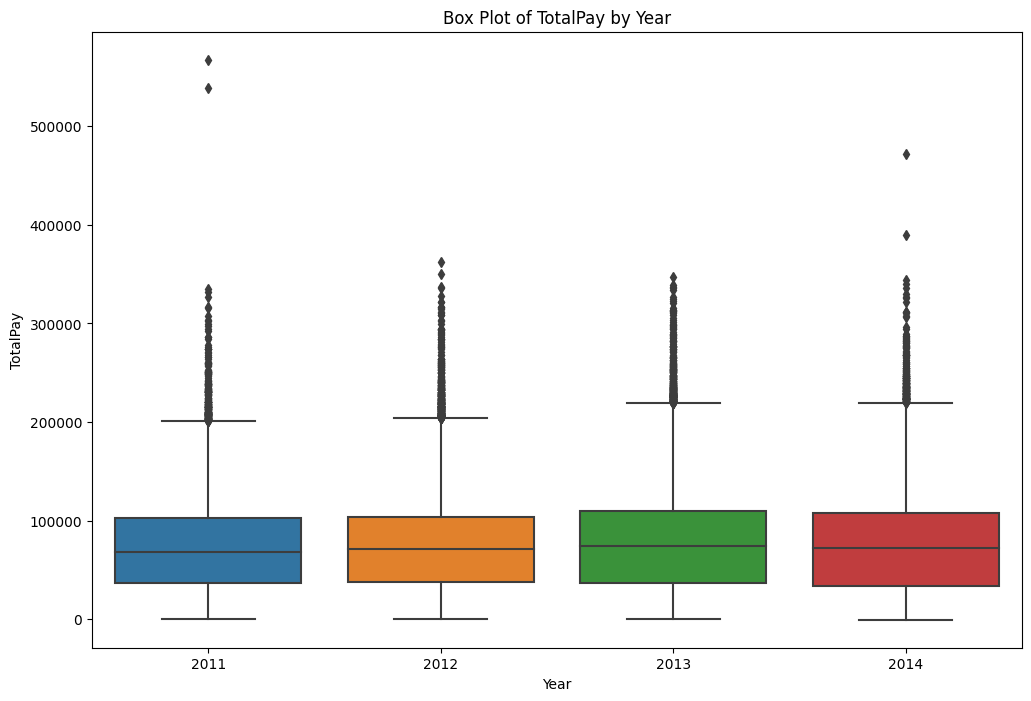

In [90]:
# Box plot of 'TotalPay' by 'Year'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='TotalPay', data=df)
plt.title('Box Plot of TotalPay by Year')
plt.show()

In [91]:
# Calculate quantiles for "TotalPay"
low, high = df["TotalPay"].quantile([0.1, 0.9])

# Create a mask to filter out outliers
mask_totalpay = df["TotalPay"].between(low, high)

# Apply the mask to remove outliers
df = df[mask_totalpay]

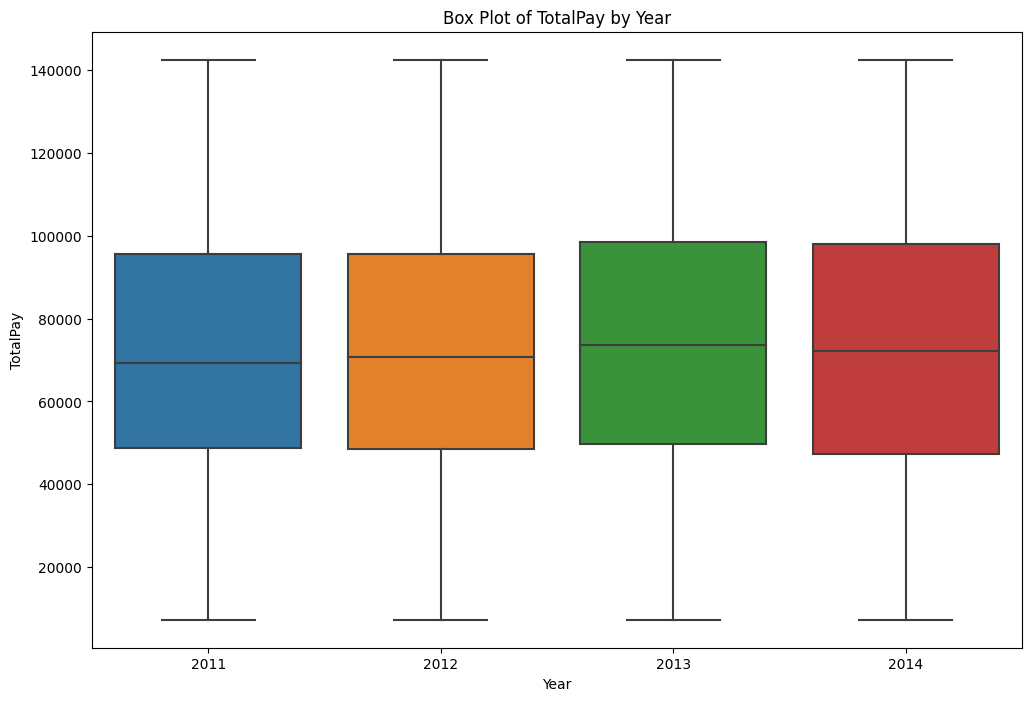

In [92]:
# Box plot of 'TotalPay' by 'Year'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='TotalPay', data=df)
plt.title('Box Plot of TotalPay by Year')
plt.show()

## 6.Summary of Insights

- The dataset consists of 148,654 rows and 13 columns.
- The dataset contains some missing values across specific columns. We dropped the columns with high percent of null values and imputed the other columns . 
- "Transit Operator" job title holds the highest count with 7036 employees, followed by "Special Nurse" at 4389
- The highest average total pay is observed for the "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY" job title with $399,211.28  

- Analyzing the average total pay trend, we notice an increase from 2011 to 2013 followed by a slight decrease in 2014.
    
- "The 'TotalPay' column  contained outliers,which then have been removed from the DataFrame.

- Exploring correlation coefficients, revealing strong positive correlations, notably between "TotalPay" and "TotalPayBenefits.","BasePay" .
- Removing the "Agency" column, considering its limited contribution to the analysis.
        

# Good Luck!